Foto Kalkulator

Projekat iz softa.

In [2]:
%matplotlib inline
import cv2
import collections
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy.spatial import distance

# k-means
from sklearn.cluster import KMeans

# keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation
from keras.optimizers import SGD

import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16, 12 # za prikaz većih slika i plotova, zakomentarisati ako nije potrebno


In [95]:
def load_image(path):
    return cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
def image_gray(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
def image_bin(image_gs):
    ret,image_bin = cv2.threshold(image_gs, 130, 255, cv2.THRESH_BINARY)
    return image_bin
def image_bin_adaptive(image_gs):
    image_bin = cv2.adaptiveThreshold(image_gs, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 35, 10)
    return image_bin
def invert(image):
    return 255-image
def display_image(image, color= False):
    if color:
        plt.imshow(image)
    else:
        plt.imshow(image, 'gray')
def dilate(image):
    kernel = np.ones((6,6)) # strukturni element 3x3 blok
    return cv2.dilate(image, kernel, iterations=1)
def erode(image):
    kernel = np.ones((6,6)) # strukturni element 3x3 blok
    return cv2.erode(image, kernel, iterations=1)

#Funkcionalnost implementirana u V2
def resize_region(region):
    resized = cv2.resize(region,(28,28), interpolation = cv2.INTER_NEAREST)
    return resized
def scale_to_range(image):
    return image / 255
def matrix_to_vector(image):
    return image.flatten()
def prepare_for_ann(regions):
    ready_for_ann = []
    for region in regions:
        ready_for_ann.append(matrix_to_vector(scale_to_range(region)))
    return ready_for_ann
def convert_output(outputs):
    return np.eye(len(outputs))
def winner(output):
    return max(enumerate(output), key=lambda x: x[1])[0]

In [94]:
def konture(image_orig, image_bin):
    
    contours, hierarchy = cv2.findContours(image_bin.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
     
    sorted_regions = []
    regions_dic = {}
    for contour in contours:
        x,y,w,h = cv2.boundingRect(contour)
        region = image_bin[y:y+h+1,x:x+w+1]
        regions_dic[x] = resize_region(region)       
        cv2.rectangle(image_orig,(x,y),(x+w,y+h),(0,255,0),2)
    
    sorted_regions_dic = collections.OrderedDict(sorted(regions_dic.items()))
    sorted_regions = sorted_regions_dic.values()
    # sortirati sve regione po x osi (sa leva na desno) i smestiti u promenljivu sorted_regions
    return image_orig, sorted_regions   
        

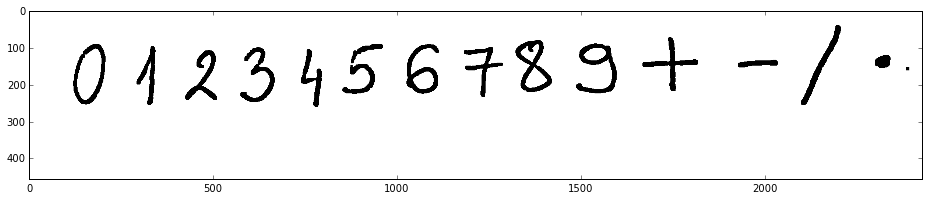

In [96]:
slika = load_image('images/training_set.jpg')
slika_blur = cv2.blur(slika, (4,4))
slika_bin = image_bin_adaptive(image_gray(slika_blur))
slika_bin = erode(slika_bin)
#slika_bin = erode(slika_bin)
display_image(slika_bin)

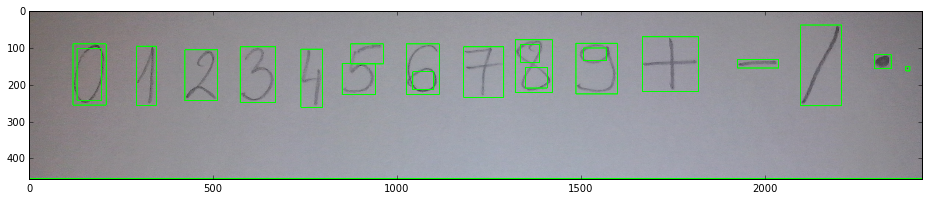

In [97]:
selektovani_regioni, cifre = konture(slika.copy(), slika_bin)
display_image(selektovani_regioni)

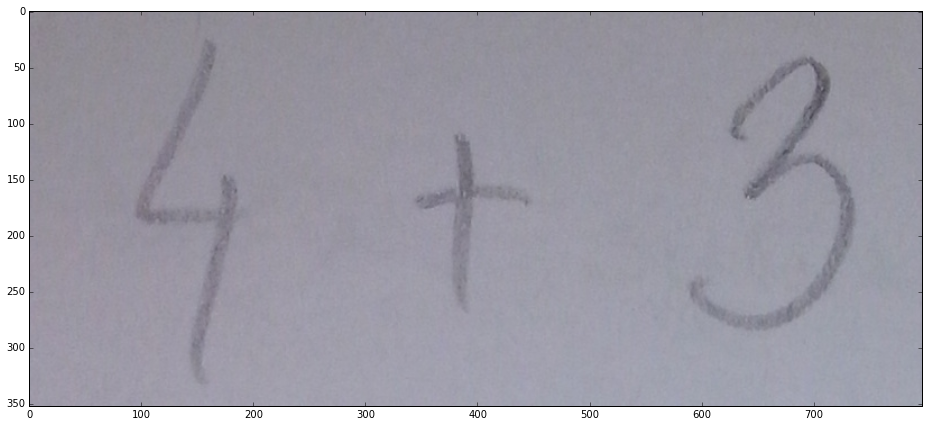

In [98]:
drugaSlika = load_image('images/slika_test1.jpg')
display_image(drugaSlika)

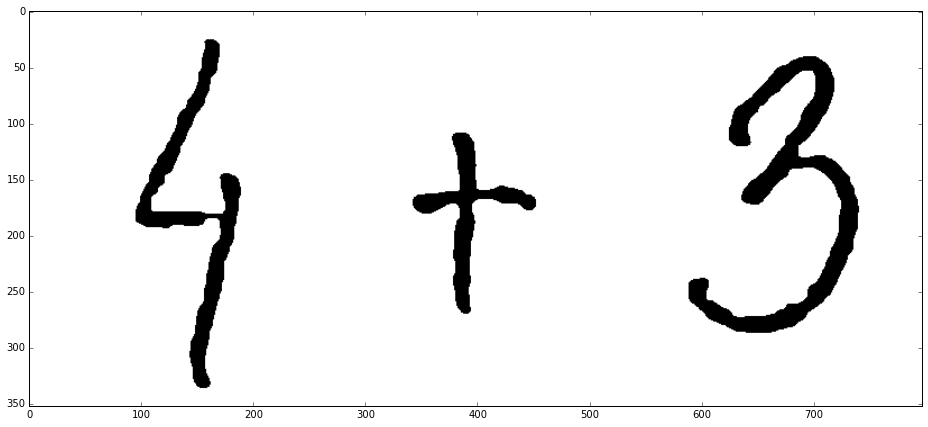

In [99]:
#drugaSlika_nesto = dilate(drugaSlika)
drugaSlika_nesto = cv2.blur(drugaSlika, (5,5))
#drugaSlika_nesto = dilate(drugaSlika_nesto)
#drugaSlika_bin = image_bin_adaptive(image_gray(drugaSlika_nesto))
drugaSlika_nesto = cv2.adaptiveThreshold(image_gray(drugaSlika_nesto), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 35, 10)
drugaSlika_nesto = erode(drugaSlika_nesto)
drugaSlika_nesto = erode(drugaSlika_nesto)
drugaSlika_nesto = cv2.blur(drugaSlika_nesto, (5,5))
drugaSlika_nesto = cv2.adaptiveThreshold(drugaSlika_nesto, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 35, 10)
drugaSlika_nesto = dilate(drugaSlika_nesto)
display_image(drugaSlika_nesto)

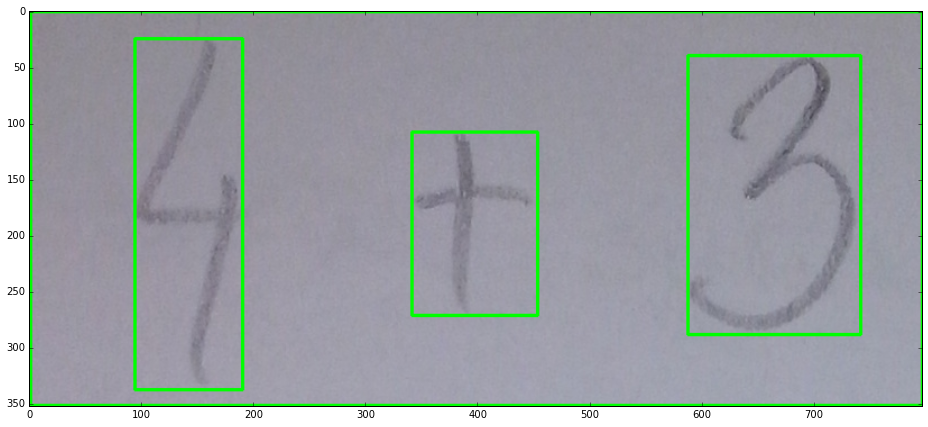

In [100]:
selektovani_regioni, cifre = konture(drugaSlika.copy(), drugaSlika_nesto)
display_image(selektovani_regioni)

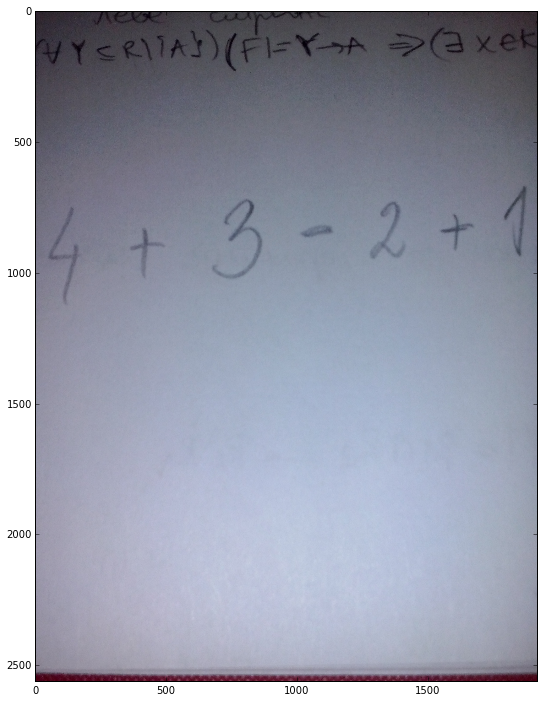

In [101]:
trecaSlika = load_image('images/slika2.jpg')
display_image(trecaSlika)

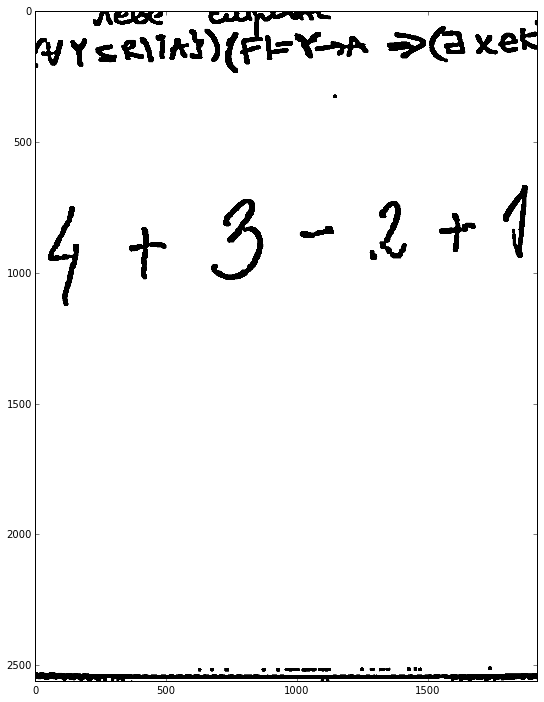

In [102]:
trecaSlika_nesto = cv2.blur(trecaSlika, (5,5))
trecaSlika_nesto = cv2.adaptiveThreshold(image_gray(trecaSlika_nesto), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 35, 10)
trecaSlika_nesto = erode(trecaSlika_nesto)
trecaSlika_nesto = erode(trecaSlika_nesto)

trecaSlika_nesto = cv2.blur(trecaSlika_nesto, (5,5))
trecaSlika_nesto = cv2.adaptiveThreshold(trecaSlika_nesto, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 35, 10)
display_image(trecaSlika_nesto)

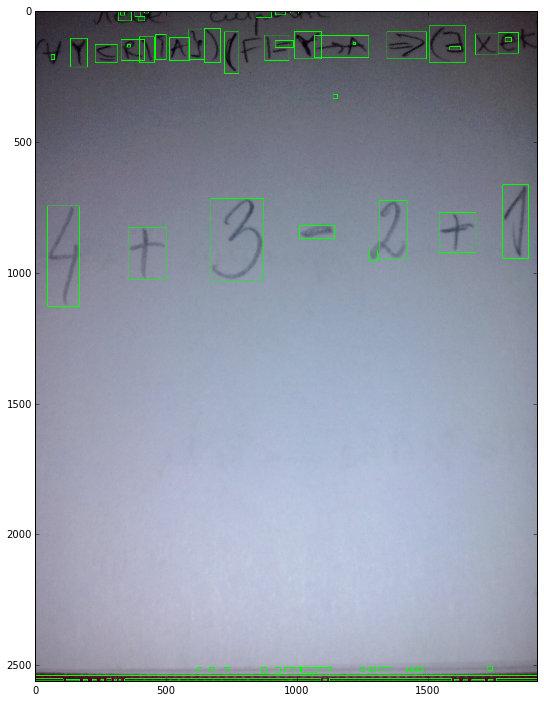

In [103]:
selektovani_regioni, cifre = konture(trecaSlika.copy(), trecaSlika_nesto)
display_image(selektovani_regioni)